In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
%matplotlib inline
import matplotlib.pyplot as plt

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import seaborn as sns
init_notebook_mode(connected=True)
import random
import math
import scipy.stats as ss

In [2]:
#Some Global Constants
categorical = 'categorical'
numerical = 'numerical'
categorical_null_val = 'None'

In [3]:
def get_col_datatype_util(col_datatype):
    return dict( [(col,str) if val==categorical else (col,float) for col,val in col_datatype.items()])

In [4]:
def get_col_datatype():
    col_datatype = {"keyword_term":categorical,"device_id":categorical,"browser_id":categorical,"user_agent":categorical,"user_agent_group_id":categorical,"domain_name":categorical,"domain_category_id":categorical,"google_url_category_id":categorical,"hour_id":categorical,"customer_id":categorical,"provider_account_id":categorical,"state_code":categorical,"city":categorical,"http_referer":categorical}

    return col_datatype

In [5]:
def get_col_default(df):
    return dict([(col,categorical_null_val) if val==categorical else (col,round(df[col].mean(),2)) for col,val in get_col_datatype().items()])

## Read DataFrame

In [6]:
df = pd.read_csv(r"C:\Users\nishant.da\Downloads\nishant_dayal_visible_data\\nishant_da_rpc_regression_data.csv",
                 escapechar="\\",quotechar="\"",dtype = get_col_datatype_util(get_col_datatype()))
df.head(100)

,keyword_term,device_id,browser_id,user_agent,user_agent_group_id,domain_name,domain_category_id,google_url_category_id,hour_id,customer_id,provider_account_id,state_code,city,http_referer,revenue
0,Luxury Home Floor Plans,3,16,Mozilla/5.0 (iPhone; CPU iPhone OS 11_3 like M...,3,homesoftherich.net,24249,500833,23,8CU7D5B89,mnet_mobile1_search,ct,bloomfield,http://instagram.com,0.332120
1,luxury home plans,3,5,Mozilla/5.0 (Linux; Android 6.0.1; H715BL Buil...,3,homesoftherich.net,24249,500879,23,8CU7D5B89,mnet_mobile1_search,az,scottsdale,http://,0.064980
2,Luxury Homes in Atlanta,2,6,Mozilla/5.0 (iPad; CPU OS 11_4 like Mac OS X) ...,2,homesoftherich.net,24249,501139,23,8CU7D5B89,mnet_mobile1_search,ga,conyers,http://homesoftherich.net,1.562190
3,Luxury Homes in Atlanta,2,6,Mozilla/5.0 (iPad; CPU OS 11_4 like Mac OS X) ...,2,homesoftherich.net,24249,501139,23,8CU7D5B89,mnet_mobile1_search,ga,conyers,http://homesoftherich.net,1.562190
4,Osteoarthritis Arthritis,2,6,Mozilla/5.0 (iPad; CPU OS 11_0_3 like Mac OS X...,2,topics.emedicinehealth.com,22045,NaN,23,8CU2N67D6,mnet_mobile936_search,in,indianapolis,http://topics.emedicinehealth.com/topic/2/Oste...,0.080178
5,Acute Ischemic Stroke Treatment,2,6,Mozilla/5.0 (iPad; CPU OS 11_4 like Mac OS X) ...,2,topics.emedicinehealth.com,22045,NaN,23,8CU2N67D6,mnet_mobile936_search,nm,albuquerque,http://topics.emedicinehealth.com/topic/2/Isch...,0.077749
6,Swelling of Legs,3,5,Mozilla/5.0 (Linux; Android 8.0.0; SM-G950U Bu...,3,topics.emedicinehealth.com,22045,NaN,23,8CU2N67D6,mnet_mobile936_search,wa,tacoma,http://topics.emedicinehealth.com/topic/1/Caus...,0.192428
7,Swelling of Legs,3,5,Mozilla/5.0 (Linux; Android 5.1.1; QTAQZ3 Buil...,3,topics.emedicinehealth.com,22045,NaN,23,8CU2N67D6,mnet_mobile936_search,ny,brooklyn,http://topics.emedicinehealth.com/topic/1/Caus...,0.160357
8,Elbow Pain Relief,2,6,Mozilla/5.0 (iPad; CPU OS 11_4 like Mac OS X) ...,2,topics.emedicinehealth.com,22045,NaN,23,8CU2N67D6,mnet_mobile936_search,ca,roseville,http://topics.emedicinehealth.com/topic/2/Elbo...,0.128286
9,What is Stroke,3,5,Mozilla/5.0 (Linux; Android 7.0; LGMP260 Build...,3,topics.emedicinehealth.com,22045,NaN,23,8CU2N67D6,mnet_mobile936_search,mi,ypsilanti,http://topics.emedicinehealth.com/topic/2/Caus...,0.080178


## Global Constants

In [7]:
target_col = "revenue"
weight_col = None

In [8]:
#Global Constants
weighted_target_col = 'weighted_target'
misc_percent = 0.005
misc_col_value = 'Others'
col_datatype = get_col_datatype()
col_default = get_col_default(df)

In [9]:
if weight_col is None:
    weight_col='weight'
    df[weight_col] = 1

In [10]:
df['http_referer'].replace(to_replace="http://",inplace=True)

In [11]:
def get_features(df):
    return [x for x in list(df.columns) if x not in [target_col,weight_col]]
    
def get_categorical_cols():
    return [x for x,v in col_datatype.items() if v==categorical]
    
def get_numerical_cols():
    return [x for x,v in col_datatype.items() if v==numerical]

In [12]:
def random_colors(num_of_colors):
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(num_of_colors)]
    return color
    
def make_copy_df(df):
    return df.copy()
    
def get_total(df,col):
    return df[col].sum()
    
def fill_default_values(df):
    for c in get_features(df):
        df[c].fillna(col_default.get(c),inplace=True)
    return df
    
def return_top_k(df,col,top_k):
    temp_df = df.sort_values(by=col,ascending=False)
    return temp_df[:top_k]

In [13]:
#Unique Values DataFrame
def unique_count(df):
    feature_col = 'Features'
    count_col = 'Unique Count'
    unique_count_df = pd.DataFrame(columns=[feature_col,count_col])
    
    unique_count_df[feature_col] = get_categorical_cols()
    unique_count_df[count_col] = unique_count_df[feature_col].apply(lambda col: df[col].nunique())
    
    return unique_count_df

## Unique Count DataFrame

In [14]:
unique_count_df = unique_count(df)
unique_count_df

,Features,Unique Count
0,keyword_term,128274
1,device_id,7
2,browser_id,26
3,user_agent,66118
4,user_agent_group_id,6
5,domain_name,9160
6,domain_category_id,3033
7,google_url_category_id,1228
8,hour_id,24
9,customer_id,3764


In [15]:
# This function returns the dataframe subset and fill NULL values with some other value
def make_group(df,col,weight_col,fill_na=False,reset_index=True):
    temp_df = pd.DataFrame(df[col+[weight_col]])
    
    if fill_na:
        temp_df = fill_default_values(temp_df)
    
    group = temp_df.groupby(col).agg({weight_col:'sum'})
    
    if reset_index:
        group = group.reset_index()
    
    return group

In [16]:
def do_miscing(df,col,weight_col,misc_percent):
    group = make_group(df,[col],weight_col)

    if_misc_col = 'if_misc'
    group[if_misc_col]=False
    
    summation = get_total(df,weight_col)*misc_percent*0.01
    
    group[if_misc_col] = group[weight_col].apply(lambda x:True if x<summation else False)
    group[col] = group.apply(lambda x:misc_col_value if x[if_misc_col] else x[col],axis=1)
    
    misced_group = make_group(group,[col],weight_col)
    return misced_group

In [17]:
def is_feature_irrelevant(df,col,weight_col,misc_percent):    
    fin_group = do_miscing(df,col,weight_col,misc_percent)
    fin_group = fin_group[(fin_group[col]!=col_default.get(col)) & (fin_group[col]!=misc_col_value)]
    
    return fin_group.empty

In [18]:
def get_irrelevant_features(df,weight_col,misc_precent):
    irrelevant_cols=[]
    
    for col in get_features(df):
        if df[col].nunique()==df.shape[0]:
            irrelevant_cols.append(col)
        elif is_feature_irrelevant(df,col,weight_col,0.05):
            irrelevant_cols.append(col)
            
    return irrelevant_cols

In [19]:
def remove_irrelevant_features(df,weight_col,misc_percent):
    irrelevant_features = get_irrelevant_features(df,weight_col,misc_percent)
    df.drop(irrelevant_features,axis=1,inplace=True)
    return df

## Remove Irrelevant Features

In [20]:
df = remove_irrelevant_features(df,weight_col,misc_percent)

In [21]:
def make_misced_df(df,target_col,weight_col):
    df = make_copy_df(df)
    df = fill_default_values(df)
    
    misced_df = pd.DataFrame(columns = list(df.columns))
    misced_df[target_col] = df[target_col]
    misced_df[weight_col] = df[weight_col]
    
    for col in get_categorical_cols():
        misced_group = do_miscing(df,col,weight_col,misc_percent)
        unique_values = set(misced_group[col].unique())
        misced_df[col] = df[col].apply(lambda x: x if (x in unique_values) else misc_col_value)
    
    for col in get_numerical_cols():
        misced_df[col] = df[col]
        
    return misced_df

## Misced DataFrame

In [22]:
misced_df = make_misced_df(make_copy_df(df),target_col,weight_col)
misced_df.head()

,keyword_term,device_id,browser_id,user_agent,user_agent_group_id,domain_name,domain_category_id,google_url_category_id,hour_id,customer_id,provider_account_id,state_code,city,http_referer,revenue,weight
0,Others,3,16,Others,3,homesoftherich.net,24249,500833,23,8CU7D5B89,mnet_mobile1_search,ct,bloomfield,http://instagram.com,0.332120,1
1,Others,3,5,Others,3,homesoftherich.net,24249,500879,23,8CU7D5B89,mnet_mobile1_search,az,scottsdale,http://instagram.com,0.064980,1
2,Others,2,6,Mozilla/5.0 (iPad; CPU OS 11_4 like Mac OS X) ...,2,homesoftherich.net,24249,501139,23,8CU7D5B89,mnet_mobile1_search,ga,conyers,Others,1.562190,1
3,Others,2,6,Mozilla/5.0 (iPad; CPU OS 11_4 like Mac OS X) ...,2,homesoftherich.net,24249,501139,23,8CU7D5B89,mnet_mobile1_search,ga,conyers,Others,1.562190,1
4,Others,2,6,Mozilla/5.0 (iPad; CPU OS 11_0_3 like Mac OS X...,2,topics.emedicinehealth.com,22045,None,23,8CU2N67D6,mnet_mobile936_search,in,indianapolis,Others,0.080178,1


In [23]:
def get_bar_trace(x,y,name=''):
    return go.Bar(x = x,y = y,name = name,opacity=0.6)

In [24]:
def plot_bar_chart(x,y,title):
    trace = get_bar_trace(x,y)
    data = [trace]
    layout = go.Layout(title=title,xaxis=dict(type='category'))
    fig = go.Figure(data=data,layout=layout)
    py.iplot(fig)

In [25]:
def calculate_missing_count(df,col,weight_col):
    temp_df = df[df[col].isnull()][weight_col]
    return temp_df.sum()

In [26]:
#Missing Values Plot (Count and Ratio)
def missing_values_plot(df,weight_col):
    feature_col = 'Features'
    count_col = 'Count'
    ratio_col = 'Ratio'
    
    missing = pd.DataFrame(columns=[feature_col,count_col,ratio_col])
    
    missing[feature_col]=get_features(df)
    missing[count_col] = missing[feature_col].apply(lambda col: calculate_missing_count(df,col,weight_col))
    
    total_weight = get_total(df,weight_col)
    
    missing[ratio_col] = missing[count_col].apply(lambda x:x/total_weight) 
    missing.sort_values(by=count_col,ascending=False,inplace=True)
    
    plot_bar_chart(missing[feature_col],missing[count_col],'Missing Count')
    plot_bar_chart(missing[feature_col],missing[ratio_col],'Missing Ratio')

## Missing Count and Ratio

In [27]:
missing_values_plot(make_copy_df(df),weight_col)

## Plotting Functions

In [28]:
def set_plt_params(width,height,title,xlabel,ylabel):
    plt.rcParams["figure.figsize"] = [width,height]
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

In [29]:
def plot_pie_chart(labels,values,title):
    data = [go.Pie(
        labels=labels,
        values=values,
        marker=dict( colors = random_colors(len(labels)) ),
        textfont=dict( size = 20 )
    )]    
    layout = go.Layout(title = title)
    
    fig = go.Figure(data=data,layout=layout)
    py.iplot(fig)

In [30]:
def pie_chart(df,col,weight_col,top_k):
    title = col
    
    group = make_group(df,[col],weight_col)
    group_top_k = return_top_k(group,weight_col,top_k)
    
    set_values = set(group_top_k[col])
    group[col] = group[col].apply(lambda x:misc_col_value if x not in set_values else x)
    
    group = make_group(group,[col],weight_col)
    
    plot_pie_chart(group[col],group[weight_col],title)

In [31]:
def get_value(df,val,col,weight_col):
    index = df[weight_col].searchsorted(val)
    ret_df = df.iloc[index].reset_index()
    
    return (ret_df.iloc[0][col])

In [32]:
def append_first_and_third_quartile(arr,df,total_len,factor,col,weight_col):
    if ((total_len+1)%4)==0:
        arr.append(get_value(df,(total_len+1)*factor,col,weight_col))
    else:
        arr.append((get_value(df,math.ceil((total_len+1)*factor),col,weight_col)+get_value(df,math.floor((total_len+1)*factor),col,weight_col))/2)

In [33]:
def quartiles(df,col,weight_col):
    df = make_copy_df(df)
    df.sort_values(by=col,inplace=True)
    df.reset_index()
    df[weight_col] = df[weight_col].cumsum()
    
    total_len = df.iloc[df.shape[0]-1][weight_col]
    arr = list()
    
    arr.append(df.iloc[0][col])
    append_first_and_third_quartile(arr,df,total_len,1/4,col,weight_col)
    
    if total_len%2==1:
        arr.append((get_value(df,total_len/2,col,weight_col)+get_value(df,(total_len/2)+1,col,weight_col))/2)
    else:
        arr.append(get_value(df,(total_len+1)/2,col,weight_col))
    
    append_first_and_third_quartile(arr,df,total_len,3/4,col,weight_col)
    arr.append(df.iloc[df.shape[0]-1][col])
    
    return arr

In [34]:
def remove_outliers(df,col,weight_col):
    quar = quartiles(df,col,weight_col)
    iqr_range = quar[3]-quar[1]
    
    df = df[df[col]>(quar[1]-1.5*iqr_range)]
    df = df[df[col]<(quar[3]+1.5*iqr_range)]
    
    return df

In [35]:
def hist_plot(df,col,weight_col,nbins):
    title = col
    
    temp_df = df[[col,weight_col]]
    temp_df = fill_default_values(temp_df)
    temp_df = remove_outliers(temp_df,col,weight_col)

    set_plt_params(20,15,title,col,'Weight')
    plt.hist(temp_df[col],bins=nbins,weights=temp_df[weight_col])
    plt.show()

In [36]:
def weight_plot(df,col,weight_col):
    for c in col:
        if col_datatype.get(c)==categorical:
            pie_chart(df,c,weight_col,100)
        elif col_datatype.get(c)==numerical:
            hist_plot(df,c,weight_col,100)

In [37]:
#Diff from Classification
def get_avg_values(df,df_weight,col,weight_col,weighted_target_col):
    columns = set([x for x in df.index])

    df = df.to_dict()
    df_weight = df_weight.to_dict()

    values = dict()
    for i in columns:
        num = df.get(weighted_target_col).get(i) if df.get(weighted_target_col).get(i) is not None else 0
        den = df_weight.get(weight_col).get(i) if df_weight.get(weight_col).get(i) is not None else 0
        values[i] = 0 if num==0 else num/den

    values.pop(col_default.get(col),None)
    values.pop(misc_col_value,None)

    return values

In [38]:
def get_topk_feature_val(df,col,target_col,weight_col,weighted_target_col,top_k):
    temp_df = df[[col,target_col,weight_col]]
    temp_df[weighted_target_col] = temp_df[target_col]*temp_df[weight_col]
        
    group_weight = return_top_k(make_group(temp_df,[col],weight_col),weight_col,top_k)
    group = make_group(temp_df,[col],weighted_target_col)
    
    group= group[group[col].isin(group_weight[col])]
    
    group.set_index(col,inplace=True)
    group_weight.set_index(col,inplace=True)
    
    return get_avg_values(group,group_weight,col,weight_col,weighted_target_col)

In [39]:
def avg_val_bar_plot(df,col,target_col,weight_col,weighted_target_col,top_k):
    values = get_topk_feature_val(df,col,target_col,weight_col,weighted_target_col,top_k)
    
    sorted_values = sorted(values.items(), key=lambda kv: kv[1],reverse=True)
    sorted_x = [x[0] for x in sorted_values]
    sorted_y = [x[1] for x in sorted_values]
    
    plot_bar_chart(sorted_x,sorted_y,'Average Value Plot : '+str(col))

In [40]:
def dist_plot(df,col,weight_col,nbins):
    title = col
    
    temp_df = df[[col,weight_col]]
    temp_df = fill_default_values(temp_df)
    temp_df = remove_outliers(temp_df,col,weight_col)
    
    ax = sns.distplot(temp_df[col],kde=True,bins=nbins,
                 hist_kws={'weights': temp_df[weight_col]})
    ax.set(xlabel=col, ylabel='Probability',title=title)
    
    plt.show()

In [41]:
def average_value_plot(df,col,target_col,weight_col,weighted_target_col):
    for c in col:
        if col_datatype.get(c)==categorical:
            avg_val_bar_plot(df,c,target_col,weight_col,weighted_target_col,100)
        elif col_datatype.get(c)==numerical:
            dist_plot(df,c,weight_col,100)

In [42]:
def set_sns_params(figsize,ax_facecolor,fig_facecolor):
    sns.set(rc={'figure.figsize':figsize,'axes.facecolor':ax_facecolor, 'figure.facecolor':fig_facecolor})

In [43]:
def scatter_plot_util(df,x_col,y_col,weight_col):
    set_sns_params((12,9),'white','white')
    sns.stripplot(x=x_col,y=y_col,data=df,jitter=True)

In [44]:
def scatter_plot(df,columns,y_col,weight_col,col_datatype):
    if col_datatype.get(y_col)==numerical:
        for col in columns:
            scatter_plot_util(df,col,y_col,weight_col)

In [45]:
def box_plot_util(df,title,col,weight_col,group_col=None):
    df = make_copy_df(df)
    data = []
    
    if group_col==None:
        arr = quartiles(df,col,weight_col)
        arr.insert(int(len(arr)/2),arr[int(len(arr)/2)])
        data.append(go.Box(y=arr))
    else:
        for c in df[group_col].unique():
            arr = quartiles(df[df[group_col]==c],col,weight_col)
            arr.insert(int(len(arr)/2),arr[int(len(arr)/2)])
            data.append(go.Box(y=arr,name=c))
    
    layout = go.Layout(title = title)
    fig = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)

In [46]:
def box_plot(df,columns,weight_col,col_datatype,group_col=None):
    for col in columns:
        if col_datatype.get(col)==numerical:
            box_plot_util(df,'Box Plot',col,weight_col,group_col)

## Mean Encoding

In [47]:
#Make Encoded Data
def categorical_to_numerical_TBS(col,default_val,group,group_weight,weight_col,weighted_target_col,prior,include_na=False):
    if (include_na==True) & (col==default_val):
        return None
    
    num = group.get(weighted_target_col).get(col) if group.get(weighted_target_col).get(col) is not None else 0
    den = group_weight.get(weight_col).get(col) if group_weight.get(weight_col).get(col) is not None else 0
    den = den+1
    retval = (num+prior)/den if num!=0 else 0
    return retval

v_categorical_to_numerical_TBS = np.vectorize(categorical_to_numerical_TBS)

In [48]:
def calculate_prior(df,target_col,weight_col):
    prior = ((df[target_col]*df[weight_col]).sum())/df[weight_col].sum()
    return round(prior,4)

In [49]:
def make_numerical_df(df,target_col,weight_col,weighted_target_col,include_na=True):
    df = make_copy_df(df)
    df = fill_default_values(df)
    
    numerical_df = pd.DataFrame(columns = list(df.columns))
    numerical_df[target_col] = df[target_col]
    numerical_df[weight_col] = df[weight_col]
    
    df[weighted_target_col] = df[target_col]*df[weight_col]
    prior = calculate_prior(df,target_col,weight_col)
    
    for col in get_categorical_cols():
        group = make_group(df,[col],weighted_target_col,fill_na=False,reset_index=False).to_dict()
        group_weight = make_group(df,[col],weight_col,fill_na=False,reset_index=False).to_dict()
        default_val = col_default.get(col)
        numerical_df[col] = v_categorical_to_numerical_TBS(df[col],default_val,group,group_weight,weight_col,
                                                           weighted_target_col,prior,include_na)
                                                            
    for col in get_numerical_cols():
        numerical_df[col] = df[col]
        
    return numerical_df

In [50]:
numerical_df_without_na = make_numerical_df(misced_df,target_col,weight_col,weighted_target_col,False)

## Linear Regression

In [51]:
#Linear Regression Model
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

In [52]:
def weighted_mean(df,col, weight_col):
    return (df[col]*df[weight_col]).sum()/df[weight_col].sum()

In [53]:
def weighted_std(df,columns,weight_col):
    den = get_total(df,weight_col)
    std_list = list()
    
    for col in columns:
        mean = weighted_mean(df,col,weight_col)
        diff = (df[col]-mean)**2
        diff = diff*df[weight_col]
        std_list.append(math.sqrt(diff.sum()/den))
        
    return std_list

In [54]:
def get_coeff_df(df,model,columns):
    coeff_df = pd.DataFrame(columns=['col','coeff','std','Coefficient'])
    coeff_df['coeff'] = list(model.coef_)
    coeff_df['col'] = columns
    coeff_df['std'] = weighted_std(df,columns,weight_col)
    coeff_df['Coefficient'] = abs(coeff_df['coeff']*coeff_df['std'])
    coeff_df = coeff_df.sort_values(by='Coefficient',ascending=False)
    coeff_df.drop(['coeff','std'],axis=1,inplace=True)
    return coeff_df

In [55]:
def fit_linear_regression_model(df,target_col,weight_col,columns=None,reg=False,alpha=1):
    train_df = make_copy_df(df)
    
    target = train_df[target_col]
    train_df.drop([target_col],axis=1,inplace=True)
    weight = train_df[weight_col]
    train_df.drop([weight_col],axis=1,inplace=True)
    
    if columns is not None:
        train_df.drop(columns,axis=1,inplace=True)
    
    if reg:
        model = Lasso(alpha=alpha)
    else:
        model = LinearRegression(verbose=1)
        
    model.fit(train_df,target)
    
    train_df[target_col] = df[target_col]
    train_df[weight_col] = df[weight_col]
    coeff_df = get_coeff_df(train_df,model,get_features(train_df))
    
    return (model,coeff_df)

In [56]:
linear_model,coeff_df = fit_linear_regression_model(numerical_df_without_na,target_col,weight_col,None,True,0.003)

## Coefficient DataFrame

In [57]:
coeff_df

,col,Coefficient
0,keyword_term,0.211586
5,domain_name,0.105598
7,google_url_category_id,0.057780
9,customer_id,0.013732
10,provider_account_id,0.004343
1,device_id,0.000000
2,browser_id,0.000000
3,user_agent,0.000000
4,user_agent_group_id,0.000000
6,domain_category_id,0.000000


## XGBoost Implementation

In [58]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor,plot_importance,plot_tree
import graphviz

In [59]:
# Plotting Feature Importance
def plot_feature_importance(model,importance_type):
    plt.rcParams["figure.figsize"] = [12,9]
    plot_importance(model,importance_type=importance_type)
    plt.show()

In [60]:
# Plotting Tree Models
def plot_and_save_boosted_trees(model,num_of_trees,filename,width,height):
    plt.rcParams["figure.figsize"] = [width,height]

    i=0
    for i in range(num_of_trees):
        plot_tree(model,num_trees=i)
        plt.savefig(filename+str(i)+".png",dpi=150)
        plt.show()

In [61]:
def get_important_features(model):
    features_importance = model.get_booster().get_score(importance_type='cover')
    sorted_features_importance = sorted(features_importance.items(), key=lambda kv: kv[1],reverse=True)
    
    ret_list = list()
    for i in range(len(sorted_features_importance)):
        ret_list.append(sorted_features_importance[i][0])
    
    return ret_list

In [62]:
def fit_xgboost_model(df,target_col,weight_col):
    df = make_copy_df(df)

    target = df[target_col]
    df.drop([target_col],axis=1,inplace=True)
    weight = df[weight_col]
    df.drop([weight_col],axis=1,inplace=True)
    
    model = XGBRegressor(max_depth=5,learning_rate=0.1,n_estimators=10,booster='gbtree',missing=None,silent=False)
    model.fit(df,target,sample_weight=weight)
    
    return model

In [63]:
numerical_df = make_numerical_df(misced_df,target_col,weight_col,weighted_target_col,True)

In [64]:
xgboost_model = fit_xgboost_model(numerical_df,target_col,weight_col)
imp_feature_list_xgboost = get_important_features(xgboost_model)

## Feature Importance(XGBoost)

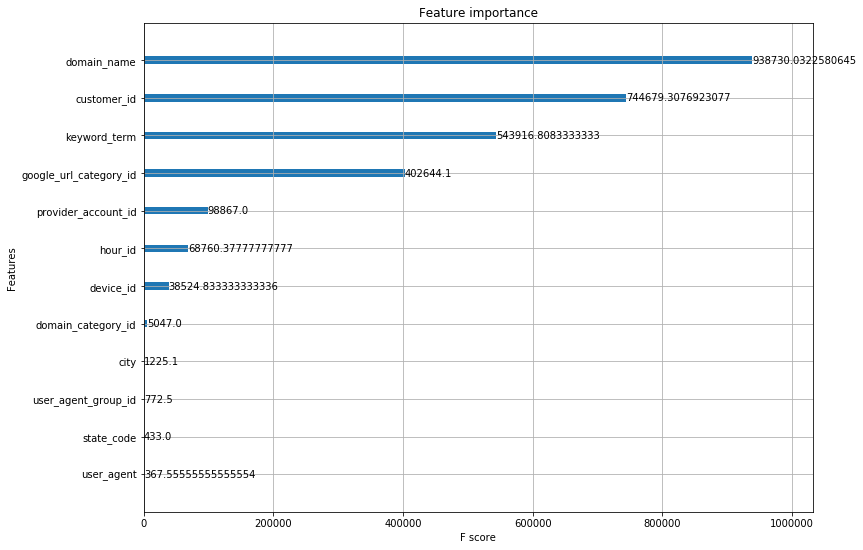

In [65]:
plot_feature_importance(xgboost_model,'cover')

## LightGBM Implementation

In [66]:
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb

In [67]:
def label_encode_data(df):
    df = make_copy_df(df)
    
    list_le = dict()
    for col in get_features(df):
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        list_le[col] = le
        
    return df,list_le

In [68]:
label_encoded_df,list_le = label_encode_data(misced_df)

In [69]:
def plot_feature_importance_lightgbm(model):
    plt.rcParams["figure.figsize"] = [12,9]
    lgb.plot_importance(model,importance_type='gain')
    plt.show()

In [70]:
def get_important_features_lightgbm(df,model):
    ret_list = list(zip(list(df.columns),lightgbm_model.booster_.feature_importance(importance_type='gain')))
    
    return [x[0] for x in sorted(ret_list, key=lambda x: x[1],reverse=True)]

In [71]:
def fit_lightgbm_model(df,target_col,weight_col):
    df = make_copy_df(df)
    
    target = df[target_col]
    df.drop([target_col],axis=1,inplace=True)
    weight = df[weight_col]
    df.drop([weight_col],axis=1,inplace=True)
    
    model = lgb.LGBMRegressor(boosting_type='gbdt',num_leaves=20,
                               max_depth=4,learning_rate=0.01,objective='regression',n_estimators=100)
    
    model.fit(df,target,sample_weight=weight,categorical_feature=get_categorical_cols())
    
    return model

In [72]:
lightgbm_model = fit_lightgbm_model(label_encoded_df,target_col,weight_col)
imp_feature_list_lightgbm = get_important_features_lightgbm(misced_df,lightgbm_model)

## Feature Importance LightGBM

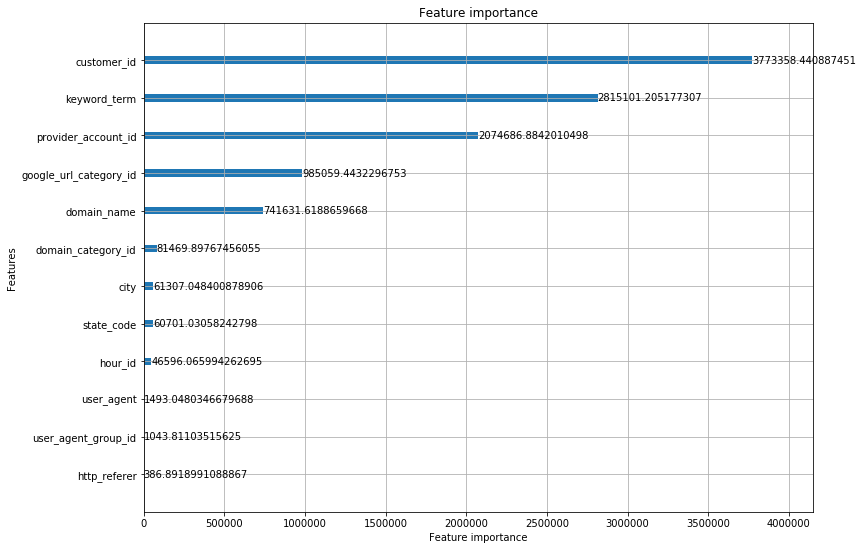

In [73]:
plot_feature_importance_lightgbm(lightgbm_model)

## Rank Mean

In [74]:
def rank_mean_util(df,col_list,rank_dict):
    col_set = set()
    
    i=1
    for col in col_list:
        rank_dict[col] = rank_dict[col]+i
        col_set.add(col)
        i +=1
        
    for col in get_features(df):
        if col not in col_set:
            rank_dict[col] +=i
    
    return rank_dict

In [75]:
def rank_mean(df,coeff_df_woe,coeff_col,imp_feature_list_xgboost,imp_feature_list_lightgbm):
    rank_dict = {}
    for col in get_features(df):
        rank_dict[col]=0
        
    rank_dict = rank_mean_util(df,list(coeff_df_woe[coeff_col]),rank_dict)
    rank_dict = rank_mean_util(df,imp_feature_list_xgboost,rank_dict)
    rank_dict = rank_mean_util(df,imp_feature_list_lightgbm,rank_dict)
    
    for col in rank_dict.keys():
        rank_dict[col] = rank_dict[col]/3
    
    sorted_by_rank = sorted(rank_dict.items(), key=lambda kv: kv[1])
    return [x[0] for x in sorted_by_rank]

In [77]:
ret_list = rank_mean(misced_df,coeff_df,'col',imp_feature_list_xgboost,imp_feature_list_lightgbm)

In [78]:
def add_to_list(ret_list,columns=None):
    if columns is not None:
        return list(set(ret_list+columns))
    else:
        return ret_list

In [79]:
ret_list = ret_list[:5]

## Weight Plot

In [80]:
weight_plot(misced_df,ret_list,weight_col)

## Average Values Plot(Average Target)

In [81]:
average_value_plot(misced_df,ret_list,target_col,weight_col,weighted_target_col)

## Box Plot

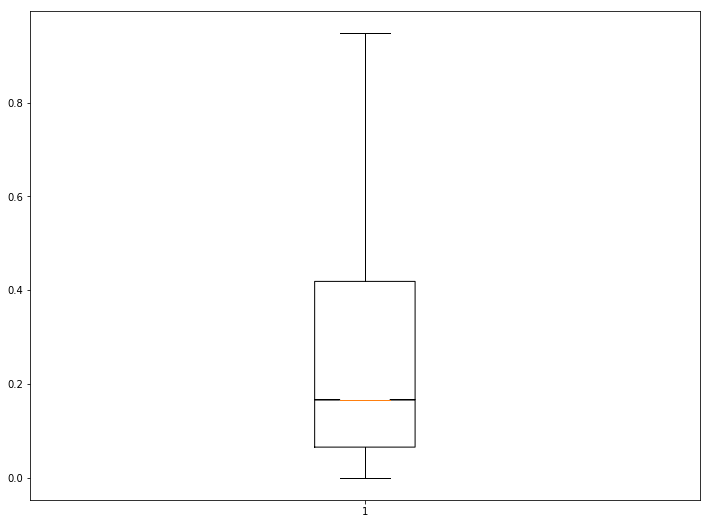

In [101]:
# box_plot(misced_df,[target_col],weight_col,col_datatype)
ax = plt.boxplot(misced_df[target_col],notch=True,showfliers=False)

## Scatter Plot

In [103]:
scatter_plot(misced_df,['device_id'],target_col,weight_col,col_datatype)

## Conditional Feature Importance(Next Candidate Feature)

In [84]:
from sklearn.metrics import r2_score

def conditional_feature_importance_util(df,target,weight,columns,model,islasso):
    train_df = df[columns]
    r2_df = pd.DataFrame(columns=['Features','R2 Coeff'])
    
    if islasso:
        model.fit(train_df,target)
        initial_r2_coeff = model.score(train_df,target)
    else:
        model.fit(train_df,target,sample_weight=weight)
        predicted_target = model.predict(train_df)
        initial_r2_coeff = r2_score(target,predicted_target,sample_weight=weight)
        
    for col in set(get_features(df))-set(columns):
        train_df[col] = df[col]
        
        if islasso:
            model.fit(train_df,target)
            r2_coeff = model.score(train_df,target)
        else:
            model.fit(train_df,target,sample_weight=weight)
            predicted_target = model.predict(train_df)
            r2_coeff = r2_score(target,predicted_target,sample_weight=weight)
        
        r2_df = r2_df.append({'Features':col,'R2 Coeff':r2_coeff-initial_r2_coeff},ignore_index=True)
        train_df.drop(col,axis=1,inplace=True)
        
    return r2_df

In [85]:
def conditional_feature_importance(df,df_with_null,columns):
    df = make_copy_df(df)
    
    target = df[target_col]
    df.drop([target_col],axis=1,inplace=True)
    weight = df[weight_col]
    df.drop([weight_col],axis=1,inplace=True)
    
    model = Lasso(alpha=0.003)
    r2_linear = conditional_feature_importance_util(df,target,weight,columns,model,True)
    
    model = XGBRegressor(max_depth=5,learning_rate=0.1,n_estimators=5,booster='gbtree',missing=None,silent=False)
    r2_xgboost = conditional_feature_importance_util(df_with_null,target,weight,columns,model,False)
    
    return (r2_linear,r2_xgboost)

In [87]:
(r2_linear,r2_xgboost) = conditional_feature_importance(numerical_df_without_na,numerical_df,['keyword_term'])

## R2 Increase on addition of each feature

In [88]:
r2_linear = r2_linear.sort_values(by = "R2 Coeff",ascending=False)
r2_linear

,Features,R2 Coeff
11,domain_name,0.027858
2,customer_id,0.023355
1,google_url_category_id,0.018784
6,provider_account_id,0.017996
8,domain_category_id,0.016659
10,http_referer,0.007017
0,user_agent,0.000000
3,state_code,0.000000
4,hour_id,0.000000
5,device_id,0.000000


In [89]:
r2_xgboost = r2_xgboost.sort_values(by = "R2 Coeff",ascending=False)
r2_xgboost

,Features,R2 Coeff
11,domain_name,0.027748
2,customer_id,0.024332
1,google_url_category_id,0.020245
6,provider_account_id,0.020135
8,domain_category_id,0.019634
10,http_referer,0.007578
4,hour_id,0.004261
5,device_id,0.002574
9,user_agent_group_id,0.002557
0,user_agent,0.001986


In [90]:
def cramers_bias_corrected(df,col1,col2,weight_col):
    confusion_matrix = pd.crosstab(df[col1], df[col2], df[weight_col], aggfunc=sum)
    confusion_matrix.fillna(0,inplace=True)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

In [91]:
def categorical_corr_df(df,weight_col,target_col=None):
    columns = get_categorical_cols()
    if(len(columns)==1):
        return
    
    if target_col is not None:
        corr = pd.DataFrame(index=columns,columns=[target_col])
        i=0
        while i<len(columns):
            corr.ix[columns[i]][target_col] = cramers_bias_corrected(df,columns[i],target_col,weight_col)
            i+=1
        corr.sort_values(by=target_col,ascending=False,inplace=True)
    else:
        corr = pd.DataFrame(index=columns,columns=columns)
        
        i=0
        while i<len(columns):
            j=i
            while j<len(columns):
                if i==j:
                    corr.ix[columns[i]][columns[j]] = 1
                else:
                    corr.ix[columns[j]][columns[i]] = cramers_bias_corrected(df,columns[i],columns[j],weight_col)
                    corr.ix[columns[i]][columns[j]] = corr.ix[columns[j]][columns[i]]
                j+=1
            i+=1
            
    return corr

In [92]:
cat_corr = categorical_corr_df(misced_df,weight_col)
cat_corr

,keyword_term,device_id,browser_id,user_agent,user_agent_group_id,domain_name,domain_category_id,google_url_category_id,hour_id,customer_id,provider_account_id,state_code,city,http_referer
keyword_term,1,0.174988,0.150271,0.0390619,0.193942,0.319383,0.335335,0.276034,0.0595924,0.334739,0.351487,0.0428066,0.0281534,0.224548
device_id,0.174988,1,0.309833,0.65099,0.98732,0.237264,0.199223,0.139991,0.0549812,0.226829,0.415138,0.051707,0.13263,0.21526
browser_id,0.150271,0.309833,1,0.601131,0.345695,0.219896,0.182955,0.12775,0.0290669,0.206434,0.212917,0.0343774,0.14396,0.22732
user_agent,0.0390619,0.65099,0.601131,1,0.713844,0.0533712,0.0548918,0.0395468,0.0391116,0.0625336,0.0822676,0.0547243,0.0382319,0.0696085
user_agent_group_id,0.193942,0.98732,0.345695,0.713844,1,0.266418,0.219799,0.154242,0.0603515,0.251645,0.45593,0.0590564,0.147882,0.236547
domain_name,0.319383,0.237264,0.219896,0.0533712,0.266418,1,0.945127,0.316063,0.0562478,0.912012,0.691197,0.0469146,0.0349759,0.486613
domain_category_id,0.335335,0.199223,0.182955,0.0548918,0.219799,0.945127,1,0.282038,0.044734,0.744687,0.580807,0.040631,0.0347684,0.38394
google_url_category_id,0.276034,0.139991,0.12775,0.0395468,0.154242,0.316063,0.282038,1,0.0398043,0.271447,0.254688,0.0292613,0.029522,0.161505
hour_id,0.0595924,0.0549812,0.0290669,0.0391116,0.0603515,0.0562478,0.044734,0.0398043,1,0.0478633,0.0465688,0.0350932,0.0442329,0.0360419
customer_id,0.334739,0.226829,0.206434,0.0625336,0.251645,0.912012,0.744687,0.271447,0.0478633,1,0.713374,0.0440395,0.0382904,0.395274


In [93]:
def cov(df, col1, col2, weight_col):
    mean_col1 = weighted_mean(df,col1,weight_col)
    mean_col2 = weighted_mean(df,col2,weight_col)
    return ((df[weight_col]*((df[col1]-mean_col1)*(df[col2]-mean_col2))).sum())/get_total(df,weight_col)

def get_pearson_coeff(df,col1,col2,weight_col):
    num = cov(df,col1,col2,weight_col)
    std1 = weighted_std(df,[col1],weight_col)[0]
    std2 = weighted_std(df,[col2],weight_col)[0]
    den = std1*std2
    return num/den

In [94]:
def numerical_corr_df(df,weight_col,target_col=None):
    #Change the below line to get_numerical_columns
    columns = get_numerical_cols()
    if(len(columns)==1):
        return
    
    if target_col is not None:
        corr = pd.DataFrame(index=columns,columns=[target_col])
        i=0
        while i<len(columns):
            corr.ix[columns[i]][target_col] = get_pearson_coeff(df,columns[i],target_col,weight_col)
            i+=1
        corr.sort_values(by=target_col,ascending=False,inplace=True)
    else:
        corr = pd.DataFrame(index=columns,columns=columns)
    
        i=0
        while i<len(columns):
            j=i
            while j<len(columns):
                corr.ix[columns[j]][columns[i]] = get_pearson_coeff(df,columns[i],columns[j],weight_col)
                corr.ix[columns[i]][columns[j]] = corr.ix[columns[j]][columns[i]]
                j+=1
            i+=1
            
    return corr

In [95]:
num_corr = numerical_corr_df(misced_df,weight_col)
num_corr

""


In [96]:
#Correlation with Target
corr_target = numerical_corr_df(misced_df,weight_col,target_col)
corr_target

,revenue


## Clustering Feature Values having similar target behaviour

In [97]:
def save_cluster(cluster_fig):
    cluster_fig.render(view=True)

In [98]:
def lightgbm_clustering(df,col,target_col,weight_col):
    target = df[target_col]
    weight = df[weight_col]
    
    train_df = pd.DataFrame(df[col])
    
    model = lgb.LGBMRegressor(boosting_type='gbdt',num_leaves=14,
                               max_depth=4,learning_rate=1,objective='regression',n_estimators=1, max_cat_threshold = 1000)
    
    model.fit(train_df,target,sample_weight=weight,categorical_feature=col)
    
    return model

In [99]:
lightgbm_cluster = lightgbm_clustering(label_encoded_df,["hour_id"],target_col,weight_col)

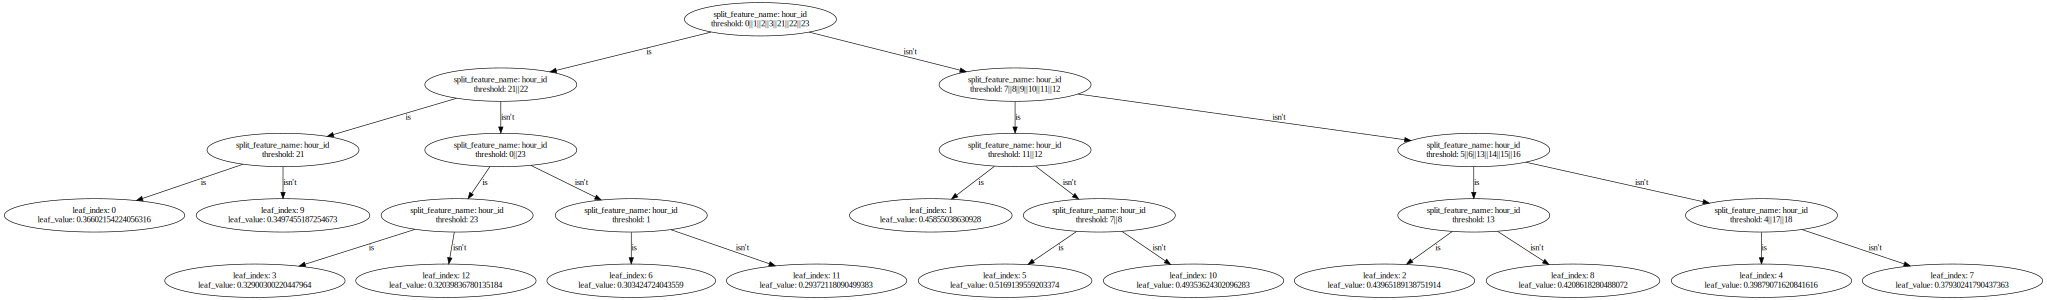

In [100]:
cluster_fig = lgb.create_tree_digraph(lightgbm_cluster,tree_index=0,filename='hour_tree',format='png')
save_cluster(cluster_fig)
cluster_fig